In [ ]:
#Importing libraries

import numpy
from sklearn import linear_model

In [4]:
#X represents the size of a tumor in centimeters (independent variable)
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes") (dependent variable).
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [6]:
#Logistic Regression Model

logr = linear_model.LogisticRegression()
logr.fit(X,y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [8]:
#predict if tumor is cancerous where the size is 3.46 cm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


In [10]:
log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03557295]]


In [12]:
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

In [15]:
# X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88])

print(logit2prob(logr, X))

[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


In [17]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [18]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [19]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [20]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [24]:
pima.info()

<class 'pandas.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pregnant  769 non-null    str  
 1   glucose   769 non-null    str  
 2   bp        769 non-null    str  
 3   skin      769 non-null    str  
 4   insulin   769 non-null    str  
 5   bmi       769 non-null    str  
 6   pedigree  769 non-null    str  
 7   age       769 non-null    str  
 8   label     769 non-null    str  
dtypes: str(9)
memory usage: 54.2 KB


In [26]:
import pandas as pd

# Trasforma più colonne contemporaneamente
pima[col_names] = pima[col_names].apply(pd.to_numeric, errors='coerce')

# Infine, converti in int (dopo aver gestito eventuali valori mancanti)
pima[col_names] = pima[col_names].fillna(0).astype(int)

In [33]:
# 1. Seleziona le colonne con le doppie parentesi [[]]
cols_to_fix = ['bmi', 'pedigree']

# 2. Converti in numerico (diventeranno float se hanno decimali)
pima[cols_to_fix] = pima[cols_to_fix].apply(pd.to_numeric, errors='coerce')

# 3. Gestisci i valori nulli 
# Meglio NON usare astype(int) su pedigree se vuoi precisione
pima[cols_to_fix] = pima[cols_to_fix].fillna(0).astype(float)

In [35]:
pima.info()

<class 'pandas.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  769 non-null    int64  
 1   glucose   769 non-null    int64  
 2   bp        769 non-null    int64  
 3   skin      769 non-null    int64  
 4   insulin   769 non-null    int64  
 5   bmi       769 non-null    float64
 6   pedigree  769 non-null    float64
 7   age       769 non-null    int64  
 8   label     769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [37]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [39]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [41]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
Y_prod = logreg.predict_proba(X_test)
print(Y_prod)
print(y_pred)

[[0.27215002 0.72784998]
 [0.6466516  0.3533484 ]
 [0.90906157 0.09093843]
 [0.78298349 0.21701651]
 [0.8740276  0.1259724 ]
 [0.34437505 0.65562495]
 [0.16421859 0.83578141]
 [0.67298063 0.32701937]
 [0.98377566 0.01622434]
 [0.29085595 0.70914405]
 [0.66592011 0.33407989]
 [0.18116363 0.81883637]
 [0.79081113 0.20918887]
 [0.3584828  0.6415172 ]
 [0.66807438 0.33192562]
 [0.24301368 0.75698632]
 [0.53759892 0.46240108]
 [0.67079178 0.32920822]
 [0.86430504 0.13569496]
 [0.80167288 0.19832712]
 [0.9050844  0.0949156 ]
 [0.29936179 0.70063821]
 [0.40419092 0.59580908]
 [0.89415066 0.10584934]
 [0.96710881 0.03289119]
 [0.8483838  0.1516162 ]
 [0.45279097 0.54720903]
 [0.85088352 0.14911648]
 [0.97712699 0.02287301]
 [0.79575682 0.20424318]
 [0.35828729 0.64171271]
 [0.90804177 0.09195823]
 [0.27502241 0.72497759]
 [0.94197134 0.05802866]
 [0.92169697 0.07830303]
 [0.67237654 0.32762346]
 [0.85925154 0.14074846]
 [0.79020163 0.20979837]
 [0.13177182 0.86822818]
 [0.80074864 0.19925136]


c:\Users\Emanuele\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[111,  20],
       [ 20,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

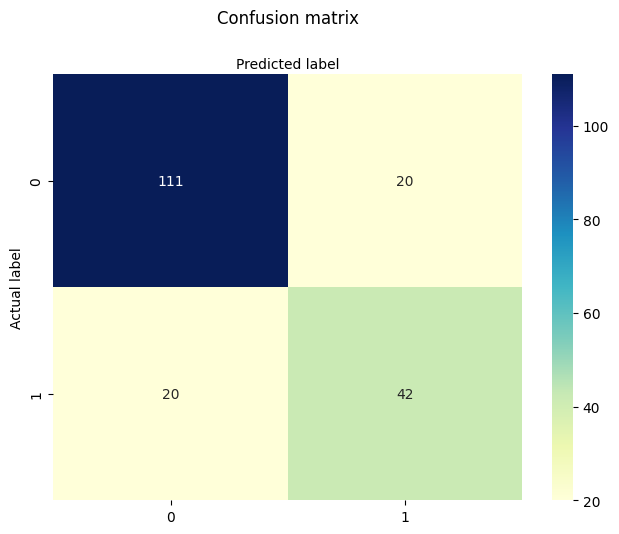

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 111 (Vero Negativo): Persone sane che il modello ha identificato correttamente come sane.
# 42 (Vero Positivo): Persone malate che il modello ha identificato correttamente come malate.
# 20 (Falso Positivo): Persone sane che il modello ha erroneamente scambiato per malate.
# 20 (Falso Negativo): Persone malate che il modello ha mancato, dicendo che erano sane.
# Classe "Without Diabetes" (Etichetta 0)Il report ti dice che il modello è molto forte qui:
# Precision (0.85): Quando il modello dice "Sano", ci indovina l'85% delle volte.
# Recall (0.85): Il modello riesce a trovare l'85% di tutte le persone effettivamente sane nel test set.
# Calcolo: # {111}/{111 + 20} = 0.847$ (che arrotondato è 0.85).
# 2. Classe "With Diabetes" (Etichetta 1)Qui i numeri saranno più bassi (probabilmente intorno a 0.68), 
# ed è normale perché i casi di diabete nel dataset sono meno numerosi e più difficili da prevedere.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))



                  precision    recall  f1-score   support

without diabetes       0.85      0.85      0.85       131
   with diabetes       0.68      0.68      0.68        62

        accuracy                           0.79       193
       macro avg       0.76      0.76      0.76       193
    weighted avg       0.79      0.79      0.79       193



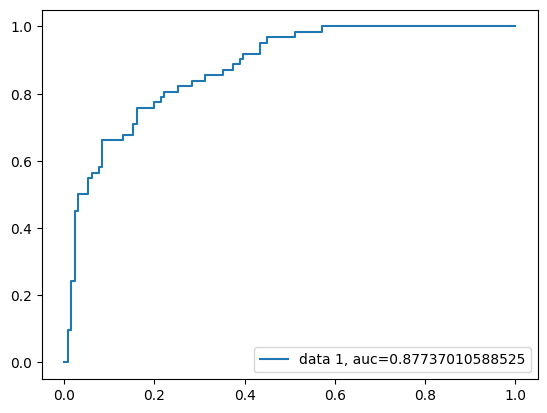

In [46]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_test_numeric = y_test.astype(int)
fpr, tpr, _ = metrics.roc_curve(y_test_numeric,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()